In [1]:
library(Seurat)
library(dplyr)
library(patchwork)
library(ggplot2)
library(RColorBrewer)
library("wesanderson")
library(cowplot)
library(SeuratDisk)

Attaching SeuratObject

Attaching sp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘RColorBrewer’ was built under R version 4.0.5”

Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



In [2]:
#Convert("./processed_data/raw_adata_afterDB_colomns_added.h5ad", dest = "h5seurat", overwrite = TRUE)

In [3]:
nuclei <- LoadH5Seurat("processed_data/raw_adata_afterDB_colomns_added.h5seurat")

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding feature-level metadata for RNA

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results



In [4]:
str(nuclei)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:296708954] 44 54 57 62 63 65 66 74 78 86 ...
  .. .. .. .. .. ..@ p       : int [1:110634] 0 4351 8614 11258 13513 15422 19123 22903 27338 29482 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 30759 110633
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:30759] "CICP27" "AP006222.1" "MTND1P23" "MTND2P28" ...
  .. .. .. .. .. .. ..$ : chr [1:110633] "AAACCCAAGCAAATGT-1-0" "AAACCCAAGCCTCAGC-1-0" "AAACCCACATGGATCT-1-0" "AAACCCAGTAGCGCCT-1-0" ...
  .. .. .. .. .. ..@ x       : num [1:296708954] 1.649 0.745 0.804 0.774 0.687 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:2

In [5]:
Idents(object = nuclei) <- 'sample_names'
samples_need <- c('2','3','5','6','7','8')
nuclei <- subset(nuclei, idents = samples_need)

In [6]:
#get rid of poor quality nuclei
nuclei <- subset(nuclei, subset = n_genes > 1000)

In [7]:
# Normalize, find variable features, and run PCA
nuclei <- NormalizeData(nuclei, normalization.method = "LogNormalize", scale.factor = 10000)
nuclei <- FindVariableFeatures(nuclei, selection.method = "vst", nfeatures = 7000)
all.genes <- rownames(nuclei)
nuclei <- ScaleData(nuclei, features = all.genes)
nuclei <- RunPCA(nuclei, features = VariableFeatures(object = nuclei))

Centering and scaling data matrix

PC_ 1 
Positive:  QKI, ZBTB20, SLC1A3, NCKAP5, NEAT1, SLC1A2, MTND2P28, ATP1A2, MAML2, ALDH1A1 
	   MTCO2P12, MTCO1P12, PARD3B, NHSL1, LINC02241, FOXO1, PREX2, DOCK1, MERTK, DAAM2 
	   GLUL, MSI2, NKAIN3, NDRG2, ATP13A4, GLI3, C1orf61, CDH20, SLC15A2, ACACB 
Negative:  KHDRBS2, AFF3, RBFOX3, GABRB3, GRIN2A, KCNQ5, ATRNL1, HECW1, FRMPD4, TMEM132D 
	   MTUS2, GRIA3, IQCJ-SCHIP1, LARGE1, DCLK1, ZNF385B, RIMBP2, LRFN5, GALNT17, TMEM178B 
	   LINGO2, RAP1GAP2, NRG1, CELF5, GRM7, TENM2, LRRTM4, PCSK2, DGKI, TENM4 
PC_ 2 
Positive:  ADGRV1, GPM6A, NKAIN3, ATP13A4, GPC5, LINC00499, PDZRN4, AL589740.1, ALDH1A1, SLC4A4 
	   GLI3, PREX2, NPAS3, PRKG1, MFGE8, RGS20, COL5A3, F3, BMPR1B, C1orf61 
	   AL137139.1, PRDM16, RFX4, GABBR1, ZNRF3, CARMIL1, ETNPPL, TRPS1, FGFR3, ACACB 
Negative:  INPP5D, DOCK8, APBB1IP, AC008571.2, PALD1, DOCK2, ENTPD1, A2M, SLCO2B1, P2RY12 
	   CSF1R, FAM149A, PLCB2, ST6GALNAC3, FYB1, AOAH, GAB3, IKZF1, MAF, IL18 
	   PTPRC, LCP2, ADAM28,

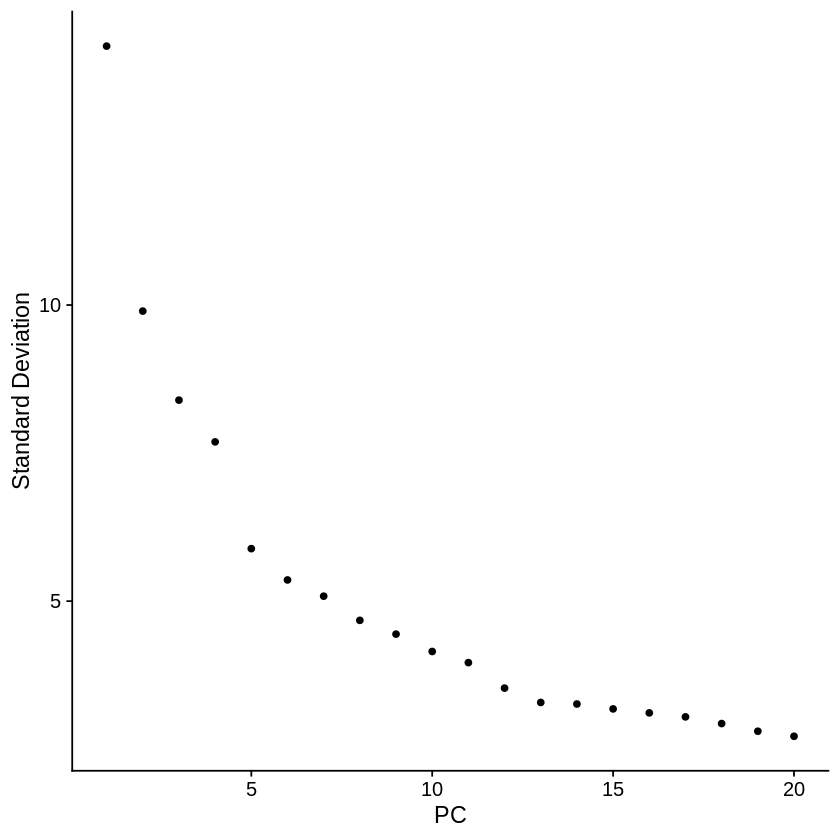

In [8]:
ElbowPlot(nuclei)

In [9]:
#find neighbors and run umap
nuclei <- FindNeighbors(nuclei, k.param = 30,dims = 1:30)
nuclei <- FindClusters(nuclei, resolution = 0.45)
nuclei <- RunUMAP(nuclei, dims = 1:30)
head(Idents(nuclei), 5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 69353
Number of edges: 4192399

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9755
Number of communities: 50
Elapsed time: 19 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
17:20:46 UMAP embedding parameters a = 0.9922 b = 1.112

17:20:46 Read 69353 rows and found 30 numeric columns

17:20:46 Using Annoy for neighbor search, n_neighbors = 30

17:20:46 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:20:52 Writing NN index file to temp file /tmp/Rtmp8Ecqry/file435beab702a

17:20:52 Searching Annoy index using 1 thread, search_k = 3000

17:21:12 Annoy recall = 100%

17:21:12 Commencing smooth kNN distance calibration using 1 thread

17:21:14 Initializing fro

AAACCCAAGAATAACC-1-1 AAACCCAAGACTGAGC-1-1 AAACCCAAGCAATAAC-1-1 
                  38                   17                   19 
AAACCCAAGCTAGATA-1-1 AAACCCAAGGCCTGAA-1-1 
                  33                   32 
50 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 49

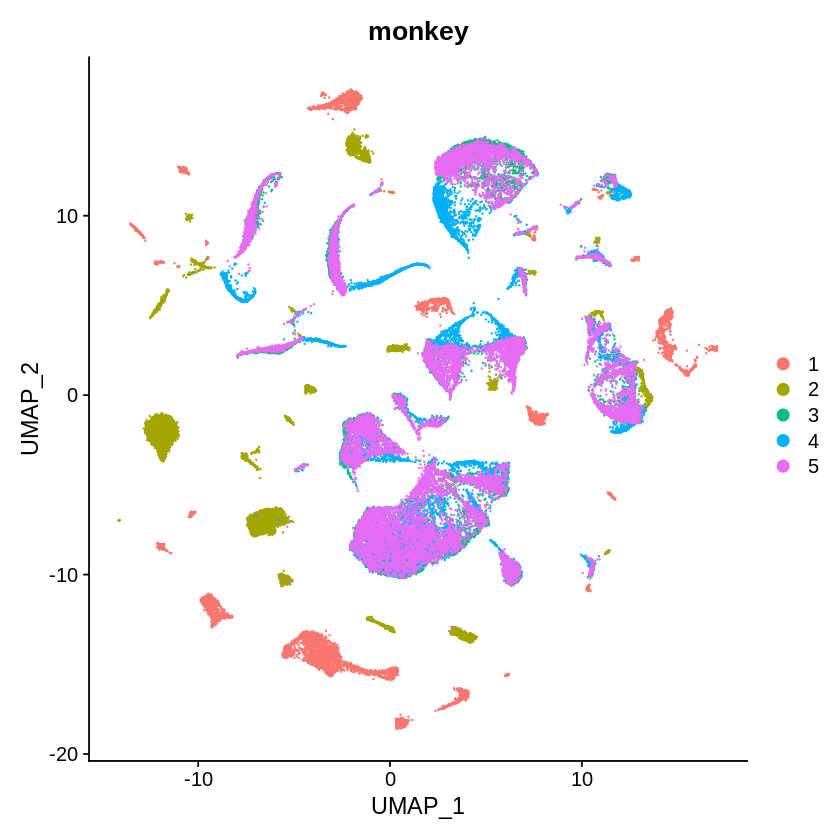

In [10]:
DimPlot(nuclei, reduction = "umap",group.by="monkey")

In [11]:
str(nuclei)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:200036203] 35 60 66 120 128 153 171 183 194 202 ...
  .. .. .. .. .. ..@ p       : int [1:69354] 0 2683 5989 11928 15167 18487 21324 24845 29470 32982 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 30759 69353
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:30759] "CICP27" "AP006222.1" "MTND1P23" "MTND2P28" ...
  .. .. .. .. .. .. ..$ : chr [1:69353] "AAACCCAAGAATAACC-1-1" "AAACCCAAGACTGAGC-1-1" "AAACCCAAGCAATAAC-1-1" "AAACCCAAGCTAGATA-1-1" ...
  .. .. .. .. .. ..@ x       : num [1:200036203] 0.206 0.468 0.496 0.332 0.289 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int 

In [12]:
nuclei.list <- SplitObject(nuclei, split.by = "monkey")
nuclei.list <- nuclei.list[c("1","2","3","4","5")]

for (i in 1:length(nuclei.list)) {
    nuclei.list[[i]] <- NormalizeData(nuclei.list[[i]], verbose = FALSE)
    nuclei.list[[i]] <- FindVariableFeatures(nuclei.list[[i]], selection.method = "vst", 
        nfeatures = 7000, verbose = FALSE)
}

reference.list <- nuclei.list[c("1", "2","3","4","5")]
nuclei.anchors <- FindIntegrationAnchors(object.list = reference.list, dims = 1:30)
nuclei.integrated <- IntegrateData(anchorset = nuclei.anchors, dims = 1:30)

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 14002 anchors

Filtering anchors

	Retained 8596 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 18628 anchors

Filtering anchors

	Retained 11362 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 13407 anchors

Filtering anchors

	Retained 7070 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 15491 anchors

Filtering anchors

	Retained 10372 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 11292 anchors

Filtering anchors

	Retained 6372 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 21340 anchors

Filtering anchors

	Retained 13876 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2098

In [13]:
DefaultAssay(nuclei.integrated) <- "integrated"

# Run the standard workflow for visualization and clustering
nuclei.integrated <- ScaleData(nuclei.integrated, verbose = FALSE)
nuclei.integrated <- RunPCA(nuclei.integrated, npcs = 30, verbose = FALSE)
nuclei.integrated <- RunUMAP(nuclei.integrated, reduction = "pca", dims = 1:30)

17:46:44 UMAP embedding parameters a = 0.9922 b = 1.112

17:46:45 Read 69353 rows and found 30 numeric columns

17:46:45 Using Annoy for neighbor search, n_neighbors = 30

17:46:45 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:46:51 Writing NN index file to temp file /tmp/Rtmp8Ecqry/file435b105fbd07

17:46:51 Searching Annoy index using 1 thread, search_k = 3000

17:47:12 Annoy recall = 100%

17:47:13 Commencing smooth kNN distance calibration using 1 thread

17:47:15 Initializing from normalized Laplacian + noise

17:47:34 Commencing optimization for 200 epochs, with 3315992 positive edges

17:48:08 Optimization finished



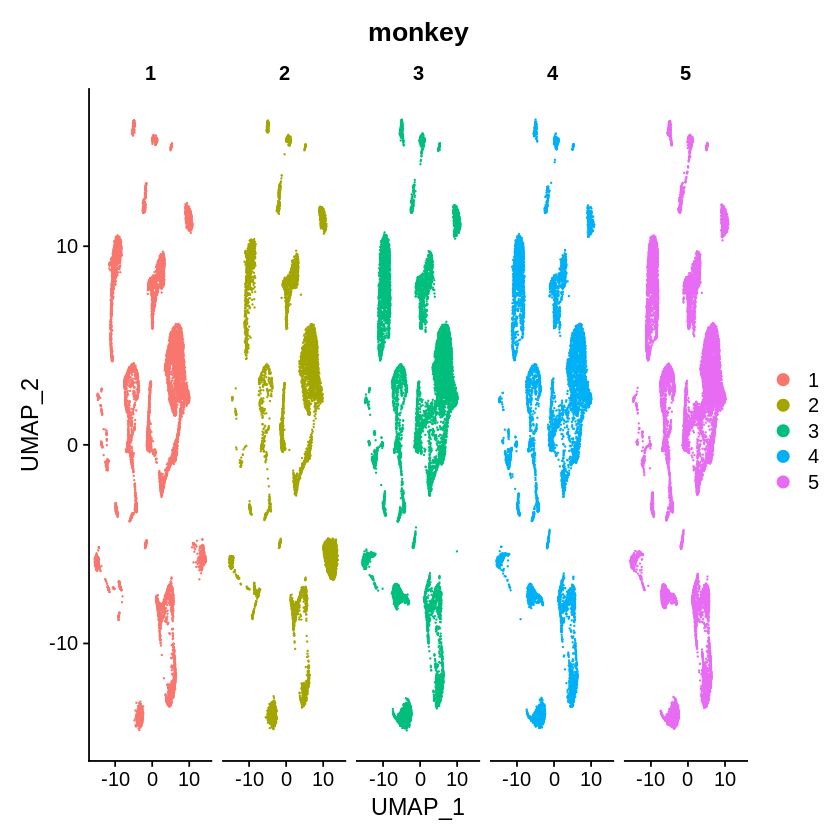

In [14]:
DimPlot(nuclei.integrated, reduction = "umap", group.by = "monkey",split.by ="monkey")

In [15]:
nuclei.integrated <- FindNeighbors(nuclei.integrated, k.param = 30,dims = 1:30)

Computing nearest neighbor graph

Computing SNN



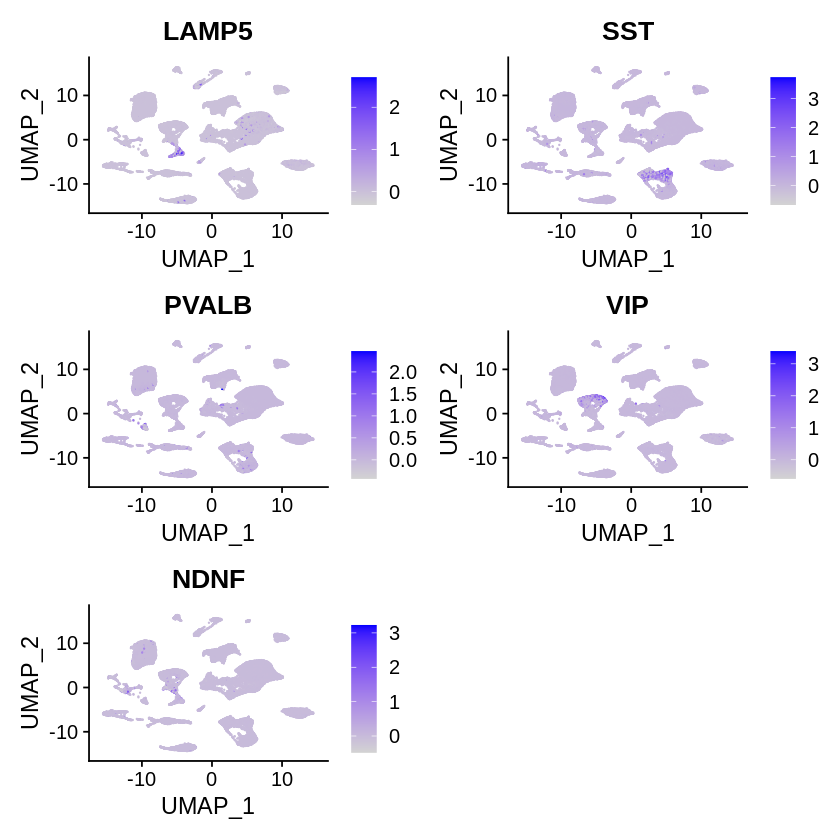

In [16]:
FeaturePlot(nuclei.integrated, features = c('LAMP5','SST','PVALB','VIP','NDNF'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

Warning message:
“Could not find ASPA in the default search locations, found in RNA assay instead”


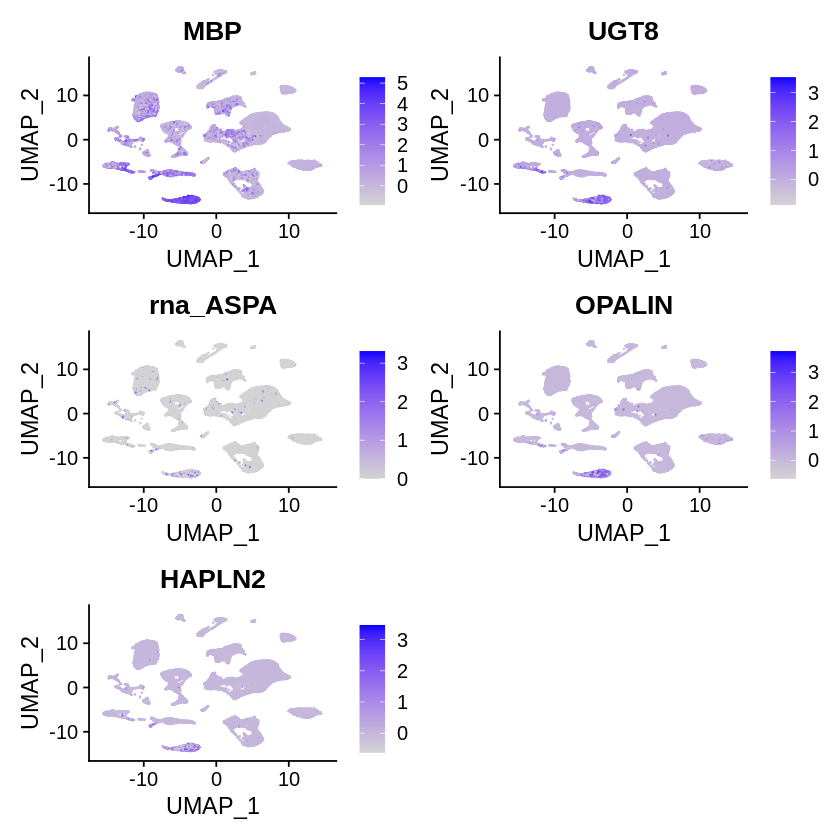

In [17]:
FeaturePlot(nuclei.integrated, features = c('MBP','UGT8','ASPA','OPALIN','HAPLN2'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

Warning message:
“Could not find RBFOX3 in the default search locations, found in RNA assay instead”
Warning message:
“Could not find SLC17A7 in the default search locations, found in RNA assay instead”
Warning message:
“Could not find TBR1 in the default search locations, found in RNA assay instead”


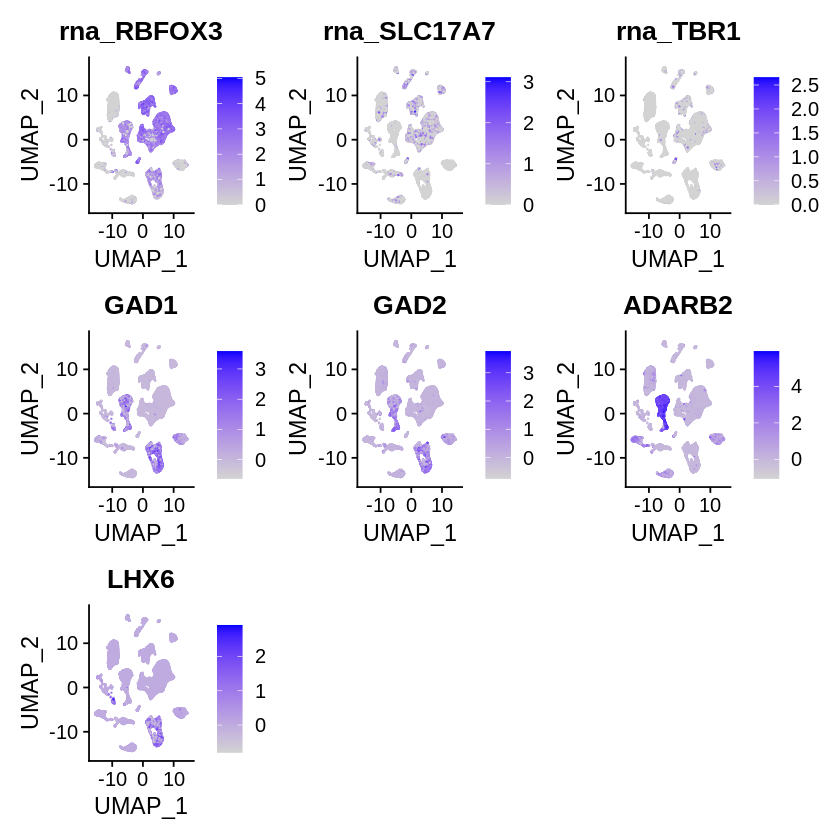

In [18]:
FeaturePlot(nuclei.integrated, features = c('RBFOX3','SLC17A7','TBR1','GAD1','GAD2','ADARB2','LHX6'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

Warning message:
“Could not find PDGFRA in the default search locations, found in RNA assay instead”


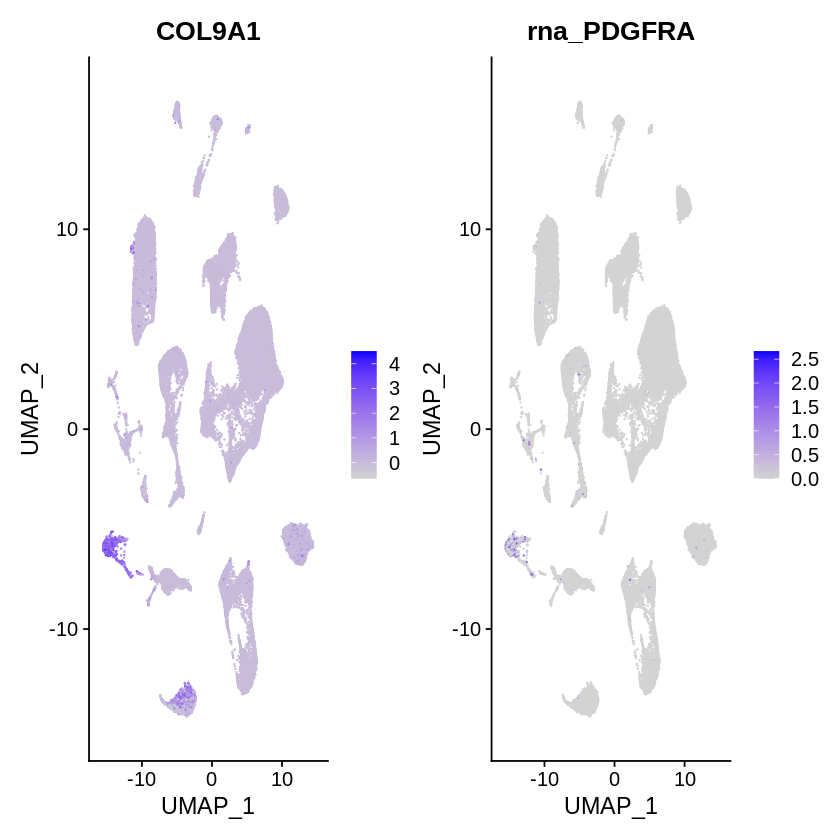

In [19]:
FeaturePlot(nuclei.integrated, features = c('COL9A1','PDGFRA'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

Warning message:
“Could not find GJA1 in the default search locations, found in RNA assay instead”


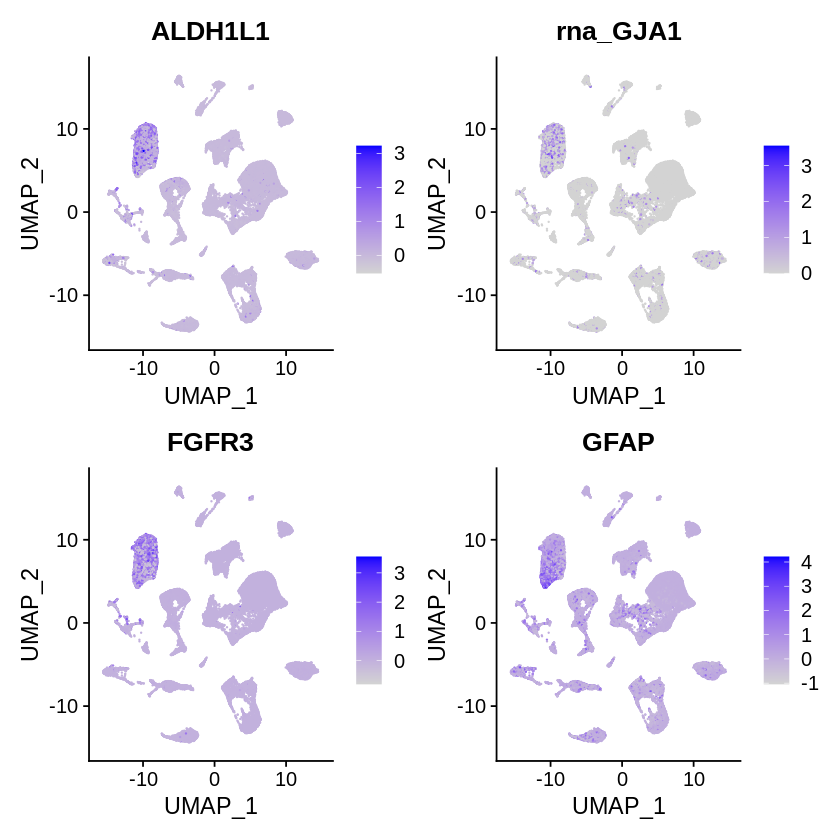

In [20]:
FeaturePlot(nuclei.integrated, features = c('ALDH1L1','GJA1','FGFR3','GFAP'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

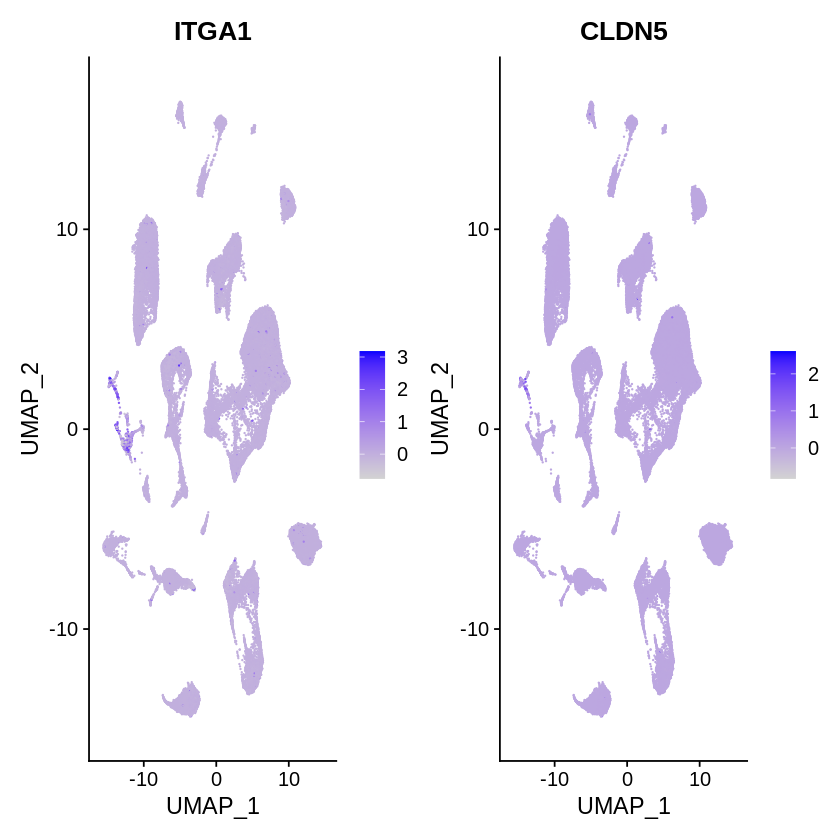

In [21]:
FeaturePlot(nuclei.integrated, features = c('ITGA1','CLDN5'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

Warning message:
“Could not find TYROBP in the default search locations, found in RNA assay instead”


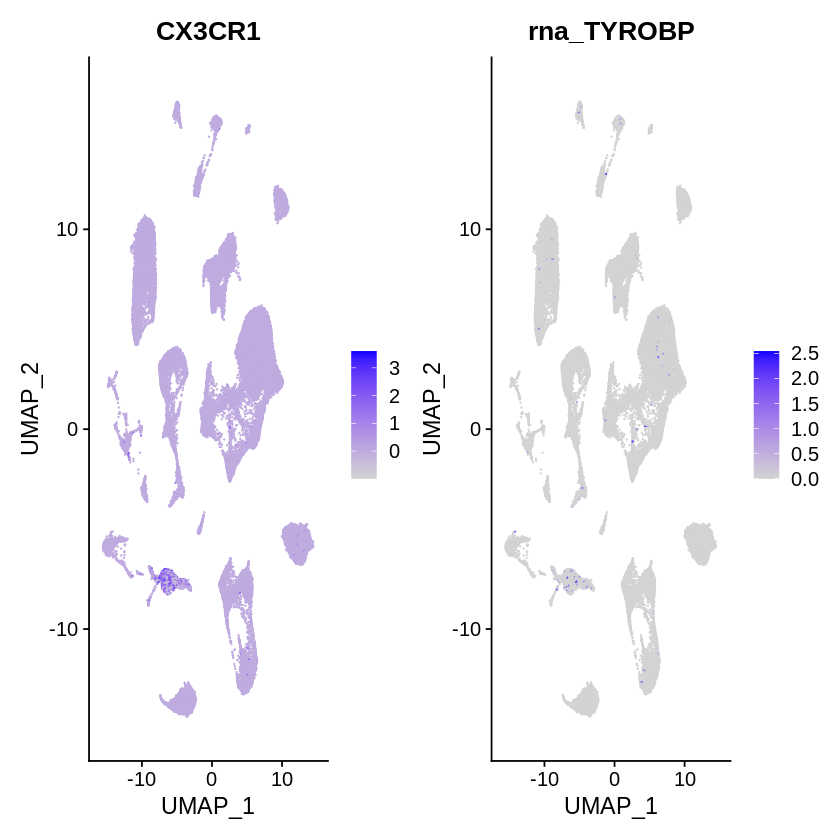

In [22]:
FeaturePlot(nuclei.integrated, features = c('CX3CR1','TYROBP'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

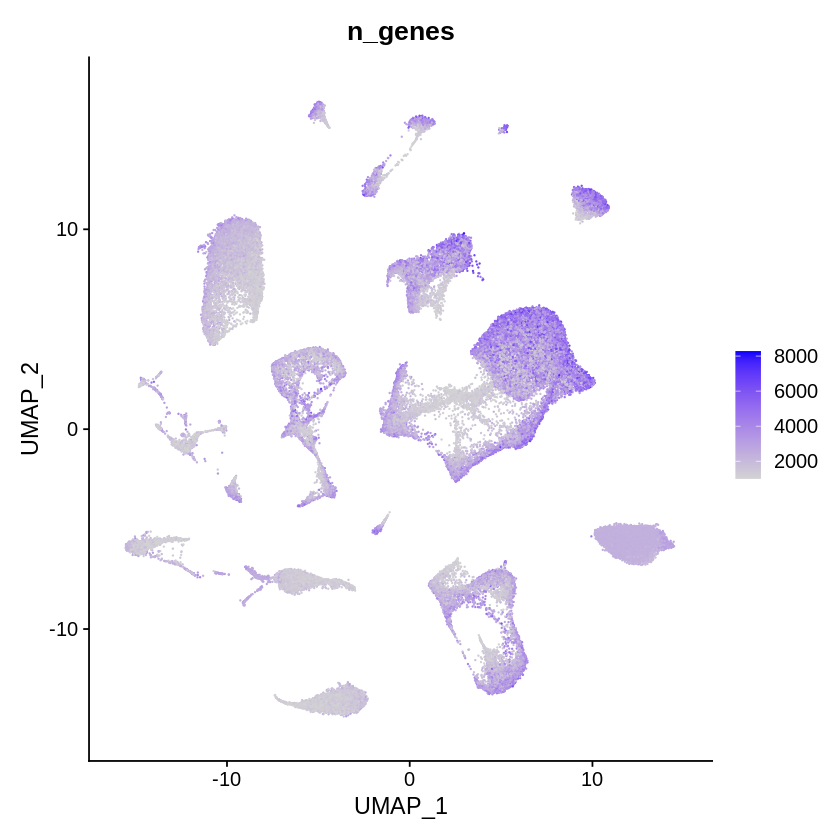

In [23]:
FeaturePlot(nuclei.integrated, features = c('n_genes'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 69353
Number of edges: 5281647

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9883
Number of communities: 20
Elapsed time: 23 seconds


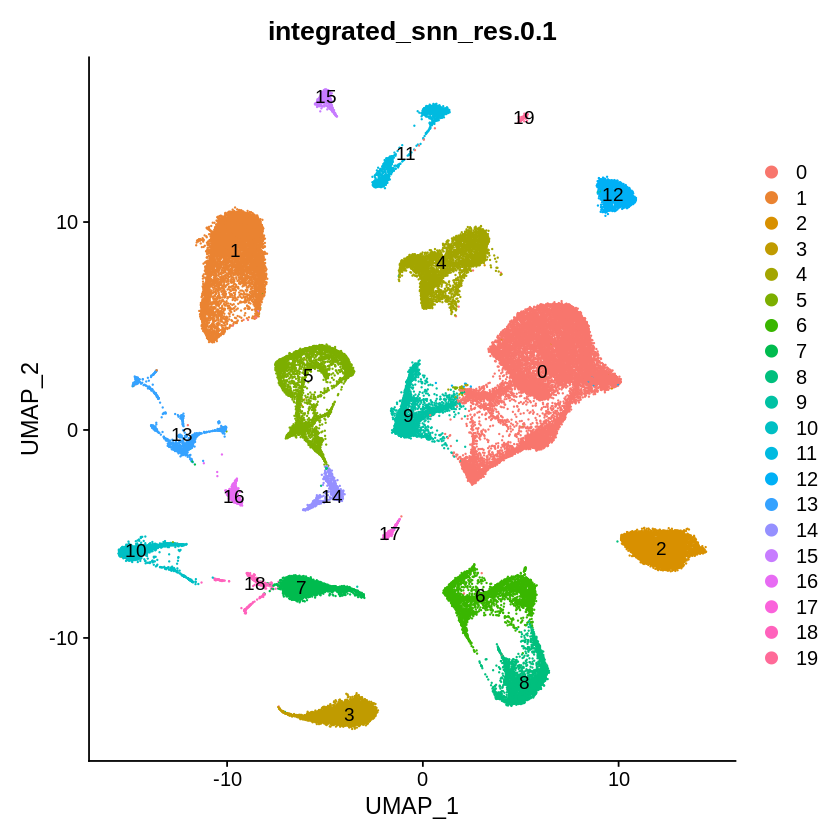

In [24]:
nuclei.integrated <- FindClusters(nuclei.integrated, resolution = 0.1)
DimPlot(nuclei.integrated, group.by = "integrated_snn_res.0.1",label = TRUE) 

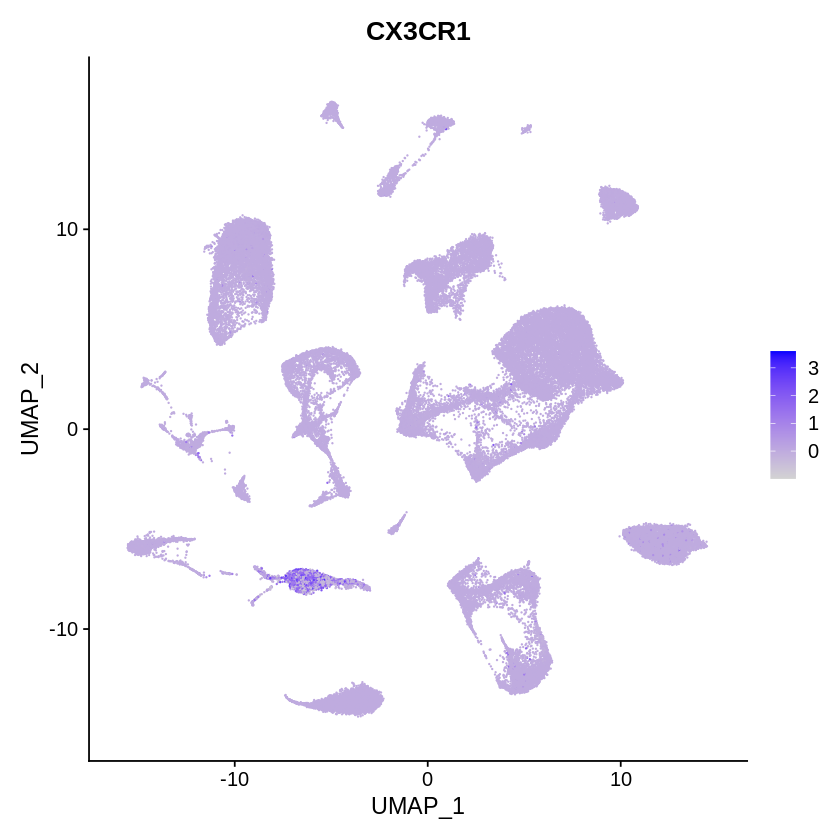

In [25]:
FeaturePlot(nuclei.integrated, features = c('CX3CR1'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

Warning message:
“Could not find RBFOX3 in the default search locations, found in RNA assay instead”


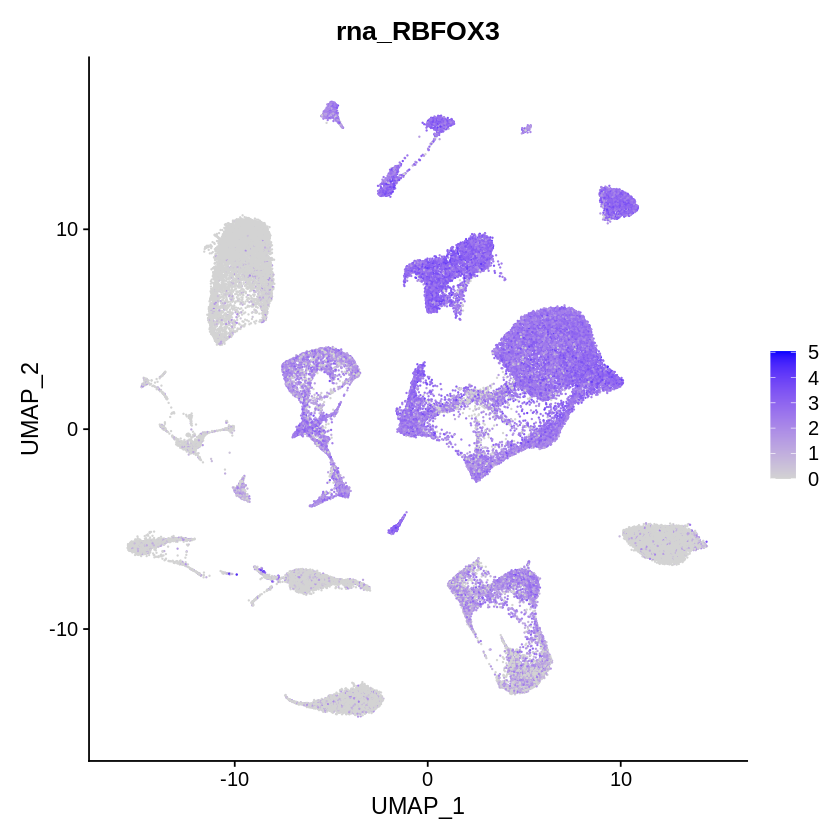

In [26]:
FeaturePlot(nuclei.integrated, features = c('RBFOX3'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

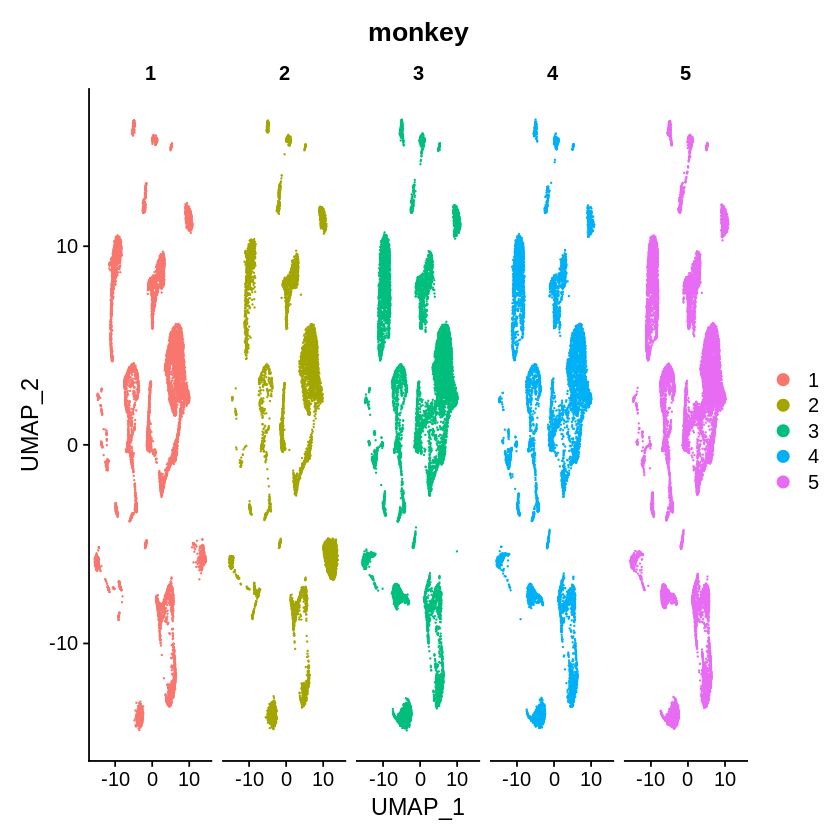

In [27]:
DimPlot(nuclei.integrated, reduction = "umap", group.by = "monkey",split.by ="monkey")

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 69353
Number of edges: 5281647

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9977
Number of communities: 13
Elapsed time: 23 seconds


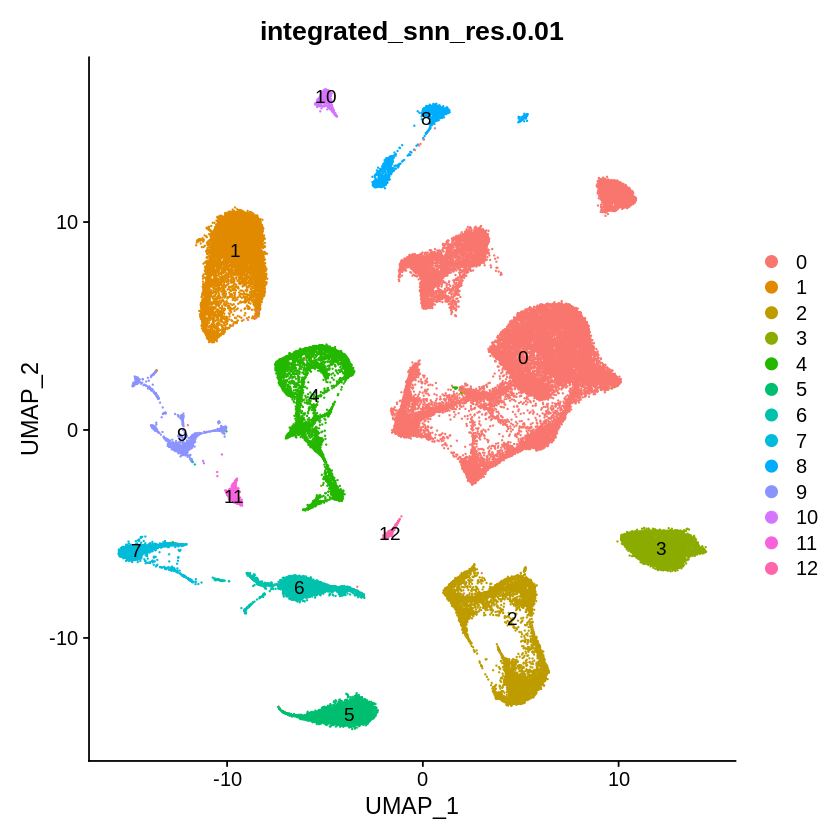

In [28]:
nuclei.integrated <- FindClusters(nuclei.integrated, resolution = 0.01)
DimPlot(nuclei.integrated, group.by = "integrated_snn_res.0.01",label = TRUE) 

In [30]:
# saveRDS(nuclei.integrated, file = "./processed_data/nuclei.integrated_1000_7000_30_30.rds")

In [31]:
nuclei <- LoadH5Seurat("/mnt/data0/Linux_1-/BigDisk/pfc_5monkey/re-run/processed_data/raw_adata_afterDB_colomns_added.h5seurat")

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding feature-level metadata for RNA

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results



In [32]:
Idents(object = nuclei) <- 'sample_names'
samples_need <- c('2','3','5','6','7','8')
nuclei <- subset(nuclei, idents = samples_need)
nuclei

An object of class Seurat 
30759 features across 85338 samples within 1 assay 
Active assay: RNA (30759 features, 0 variable features)

In [33]:
nuclei.integrated <- readRDS("./processed_data/nuclei.integrated_1000_7000_30_30.rds")

In [34]:
Idents(object = nuclei.integrated) <- 'integrated_snn_res.0.01'
neuron_cluster <- c(0,2,3,4,8,10,11,12)
neuron_all <- subset(nuclei.integrated, idents = neuron_cluster)
neuron_LowQuality <- subset(neuron_all, subset = n_genes <= 2200)
#get rid of low quality neuron cells
'%!in%' <- function(x,y)!('%in%'(x,y))
nuclei <- subset(nuclei, subset = cell_id %!in% as.numeric(unname(neuron_LowQuality$cell_id)))

In [35]:
#get rid of poor quality nuclei
nuclei <- subset(nuclei, subset = n_genes > 1000)

In [36]:
nuclei

An object of class Seurat 
30759 features across 59783 samples within 1 assay 
Active assay: RNA (30759 features, 0 variable features)

In [37]:
Idents(object = nuclei.integrated) <- 'integrated_snn_res.0.01'
damaged_cluster <- c(3)
damaged_cells <- subset(nuclei.integrated, idents = damaged_cluster)
'%!in%' <- function(x,y)!('%in%'(x,y))
nuclei <- subset(nuclei, subset = cell_id %!in% as.numeric(unname(damaged_cells$cell_id)))

In [39]:
nuclei

An object of class Seurat 
30759 features across 53611 samples within 1 assay 
Active assay: RNA (30759 features, 0 variable features)

In [40]:
nuclei <- NormalizeData(nuclei, normalization.method = "LogNormalize", scale.factor = 10000)
#redo PCA
nuclei <- FindVariableFeatures(nuclei, selection.method = "vst", nfeatures = 7000)
all.genes <- rownames(nuclei)
nuclei <- ScaleData(nuclei, features = all.genes)
nuclei <- RunPCA(nuclei, features = VariableFeatures(object = nuclei))

Centering and scaling data matrix

PC_ 1 
Positive:  RBFOX3, KHDRBS2, GRIN2A, KCNQ5, MTUS2, HECW1, FRMPD4, CHRM3, ATRNL1, GRIA3 
	   TMEM132D, PDE4D, ZNF385B, DCLK1, RAP1GAP2, TMEM178B, LRFN5, IQCJ-SCHIP1, DGKI, PCSK2 
	   LINGO2, TENM4, ACTN1, GRM7, PTPRR, NRG1, TENM2, MIATNB, PCNX2, R3HDM1 
Negative:  QKI, ZBTB20, SLC1A3, NCKAP5, NEAT1, MTND2P28, SLC1A2, MAML2, MTCO2P12, ATP1A2 
	   MTCO1P12, PARD3B, GLUL, ALDH1A1, LINC02241, NHSL1, FOXO1, NFIA, NDRG2, PREX2 
	   DOCK1, MSI2, NKAIN3, CDH20, PHLPP1, DAAM2, MERTK, C1orf61, ATP13A4, SLC15A2 
PC_ 2 
Positive:  ADGRV1, GPM6A, NKAIN3, PDZRN4, AL589740.1, GPC5, ATP13A4, SLC4A4, NPAS3, LINC00499 
	   PREX2, PRKG1, ALDH1A1, GLI3, C1orf61, RGS20, BMPR1B, CARMIL1, ZNRF3, TRPS1 
	   MFGE8, COL5A3, F3, RFX4, AL137139.1, MMD2, LUZP2, GPC6, PRDM16, ETNPPL 
Negative:  INPP5D, APBB1IP, DOCK8, AC008571.2, DOCK2, PALD1, ENTPD1, A2M, FYB1, ST6GALNAC3 
	   P2RY12, SLCO2B1, FAM149A, ARHGAP15, MAF, CSF1R, AOAH, GAB3, PTPRC, IKZF1 
	   PLCB2, ADAM28, PLCG2,

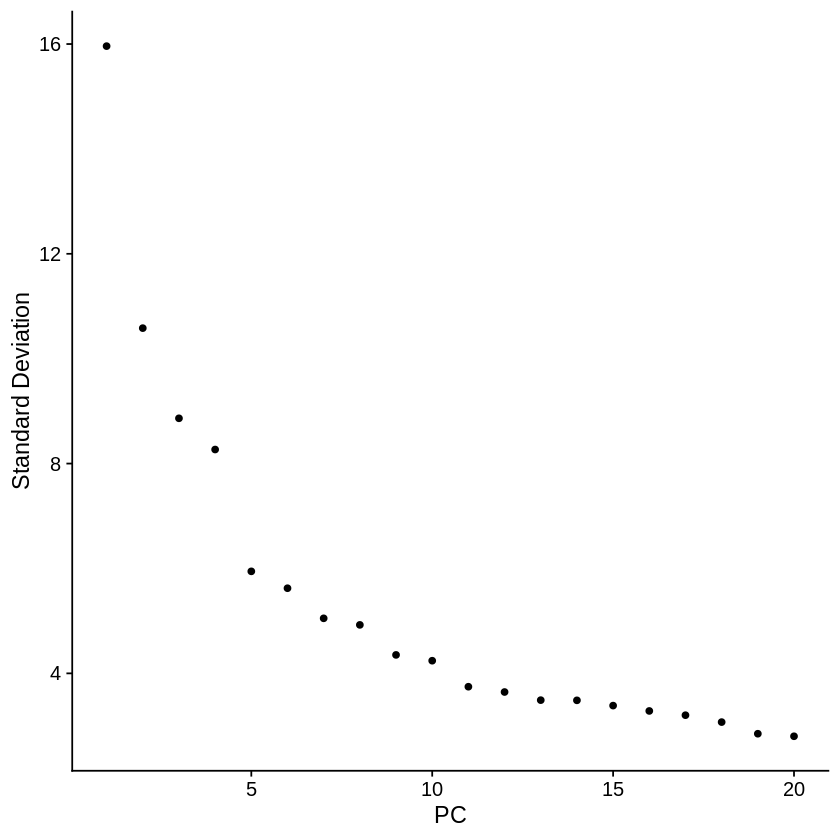

In [41]:
ElbowPlot(nuclei)

In [42]:
#redo umap
nuclei <- FindNeighbors(nuclei, k.param = 30,dims = 1:30)
nuclei <- FindClusters(nuclei, resolution = 0.45)
nuclei <- RunUMAP(nuclei, dims = 1:30)
head(Idents(nuclei), 5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 53611
Number of edges: 3429277

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9776
Number of communities: 49
Elapsed time: 13 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
20:10:05 UMAP embedding parameters a = 0.9922 b = 1.112

20:10:05 Read 53611 rows and found 30 numeric columns

20:10:05 Using Annoy for neighbor search, n_neighbors = 30

20:10:05 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:10:09 Writing NN index file to temp file /tmp/RtmpO43dYb/file5390297426e1

20:10:09 Searching Annoy index using 1 thread, search_k = 3000

20:10:24 Annoy recall = 100%

20:10:25 Commencing smooth kNN distance calibration using 1 thread

20:10:26 Initializing fr

AAACCCAAGAATAACC-1-1 AAACCCAAGACTGAGC-1-1 AAACCCAAGCAATAAC-1-1 
                  36                   13                   14 
AAACCCAAGCTAGATA-1-1 AAACCCAAGTAATTGG-1-1 
                  30                   39 
49 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 48

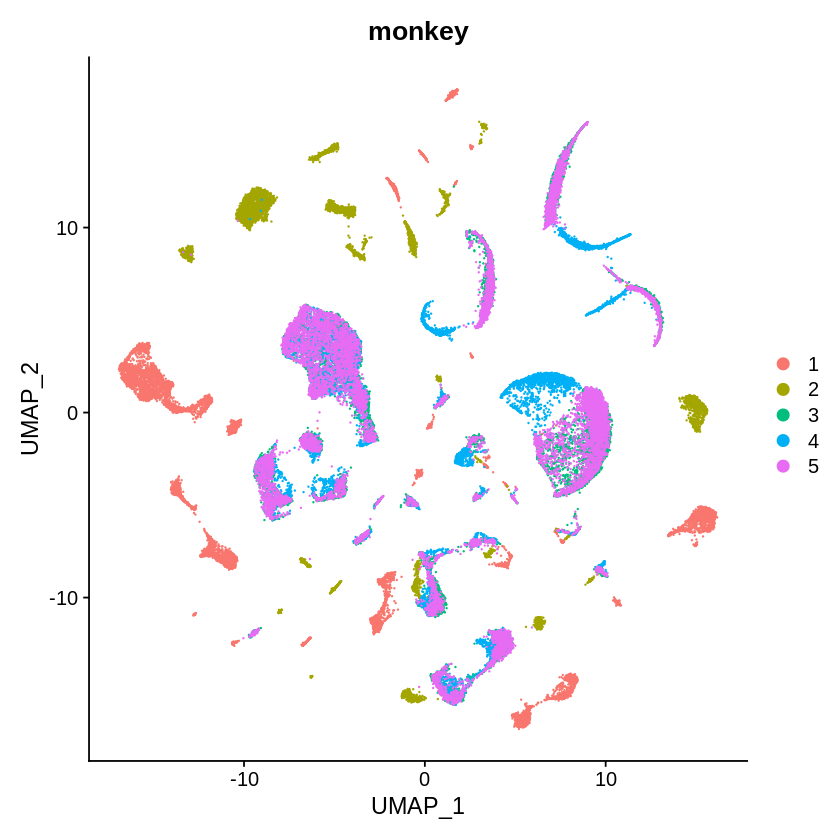

In [43]:
DimPlot(nuclei, reduction = "umap",group.by="monkey")

In [44]:
str(nuclei)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:166149548] 35 60 66 120 128 153 171 183 194 202 ...
  .. .. .. .. .. ..@ p       : int [1:53612] 0 2683 5989 11928 15167 18004 21525 26150 29662 32810 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 30759 53611
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:30759] "CICP27" "AP006222.1" "MTND1P23" "MTND2P28" ...
  .. .. .. .. .. .. ..$ : chr [1:53611] "AAACCCAAGAATAACC-1-1" "AAACCCAAGACTGAGC-1-1" "AAACCCAAGCAATAAC-1-1" "AAACCCAAGCTAGATA-1-1" ...
  .. .. .. .. .. ..@ x       : num [1:166149548] 0.206 0.468 0.496 0.332 0.289 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int 

In [45]:
nuclei.list <- SplitObject(nuclei, split.by = "monkey")
nuclei.list <- nuclei.list[c("1","2","3","4","5")]

for (i in 1:length(nuclei.list)) {
    nuclei.list[[i]] <- NormalizeData(nuclei.list[[i]], verbose = FALSE)
    nuclei.list[[i]] <- FindVariableFeatures(nuclei.list[[i]], selection.method = "vst", 
        nfeatures = 7000, verbose = FALSE)
}

reference.list <- nuclei.list[c("1", "2","3","4","5")]
nuclei.anchors <- FindIntegrationAnchors(object.list = reference.list, dims = 1:30)
nuclei.integrated <- IntegrateData(anchorset = nuclei.anchors, dims = 1:30)

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 14218 anchors

Filtering anchors

	Retained 9969 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 17519 anchors

Filtering anchors

	Retained 11549 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 13983 anchors

Filtering anchors

	Retained 8491 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 13961 anchors

Filtering anchors

	Retained 9753 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 11071 anchors

Filtering anchors

	Retained 7353 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 18839 anchors

Filtering anchors

	Retained 12890 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 18564

In [46]:
DefaultAssay(nuclei.integrated) <- "integrated"

# Run the standard workflow for visualization and clustering
nuclei.integrated <- ScaleData(nuclei.integrated, verbose = FALSE)
nuclei.integrated <- RunPCA(nuclei.integrated, npcs = 30, verbose = FALSE)
nuclei.integrated <- RunUMAP(nuclei.integrated, reduction = "pca", dims = 1:30)

20:30:58 UMAP embedding parameters a = 0.9922 b = 1.112

20:30:58 Read 53611 rows and found 30 numeric columns

20:30:58 Using Annoy for neighbor search, n_neighbors = 30

20:30:58 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:31:03 Writing NN index file to temp file /tmp/RtmpO43dYb/file539045d8fe2d

20:31:03 Searching Annoy index using 1 thread, search_k = 3000

20:31:21 Annoy recall = 100%

20:31:21 Commencing smooth kNN distance calibration using 1 thread

20:31:23 Initializing from normalized Laplacian + noise

20:31:57 Commencing optimization for 200 epochs, with 2565764 positive edges

20:32:24 Optimization finished



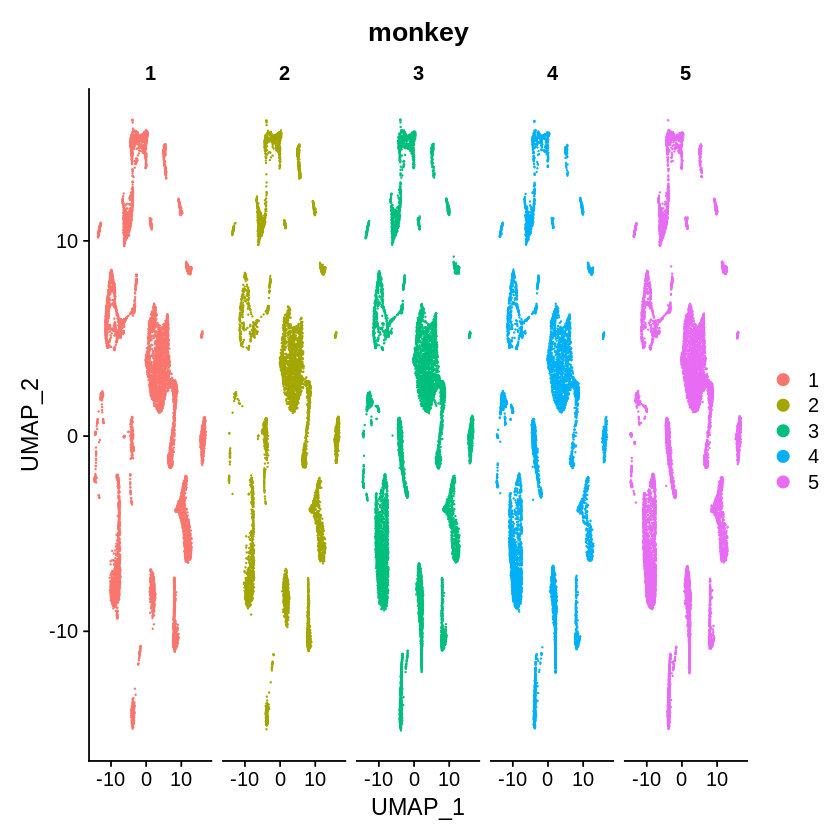

In [47]:
DimPlot(nuclei.integrated, reduction = "umap", group.by = "monkey",split.by ="monkey")

In [48]:
nuclei.integrated <- FindNeighbors(nuclei.integrated, k.param = 30,dims = 1:30)

Computing nearest neighbor graph

Computing SNN



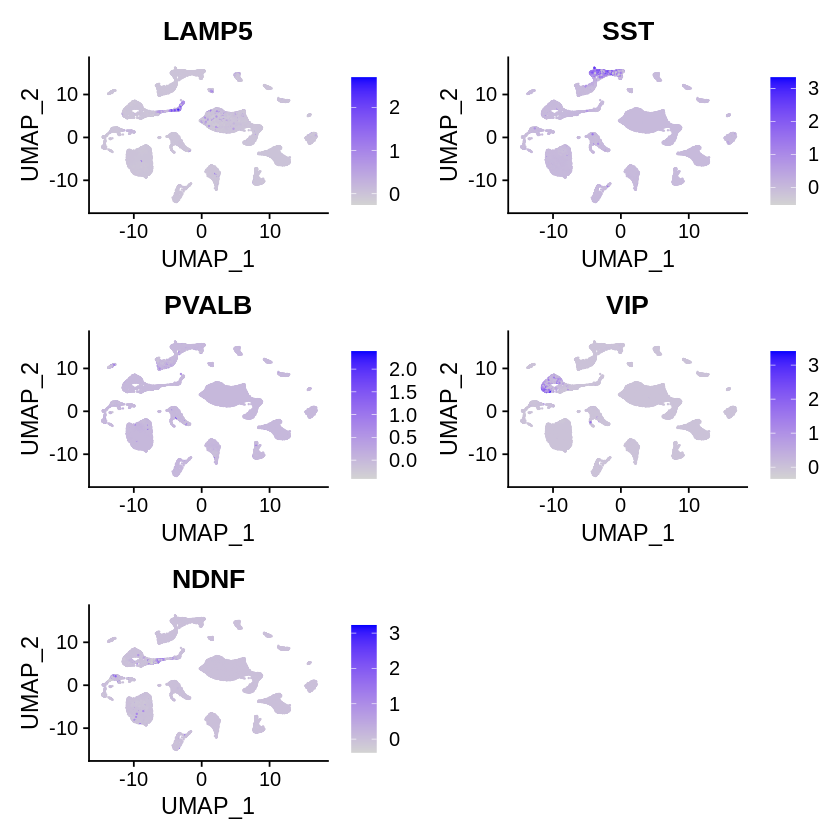

In [49]:
FeaturePlot(nuclei.integrated, features = c('LAMP5','SST','PVALB','VIP','NDNF'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

Warning message:
“Could not find ASPA in the default search locations, found in RNA assay instead”


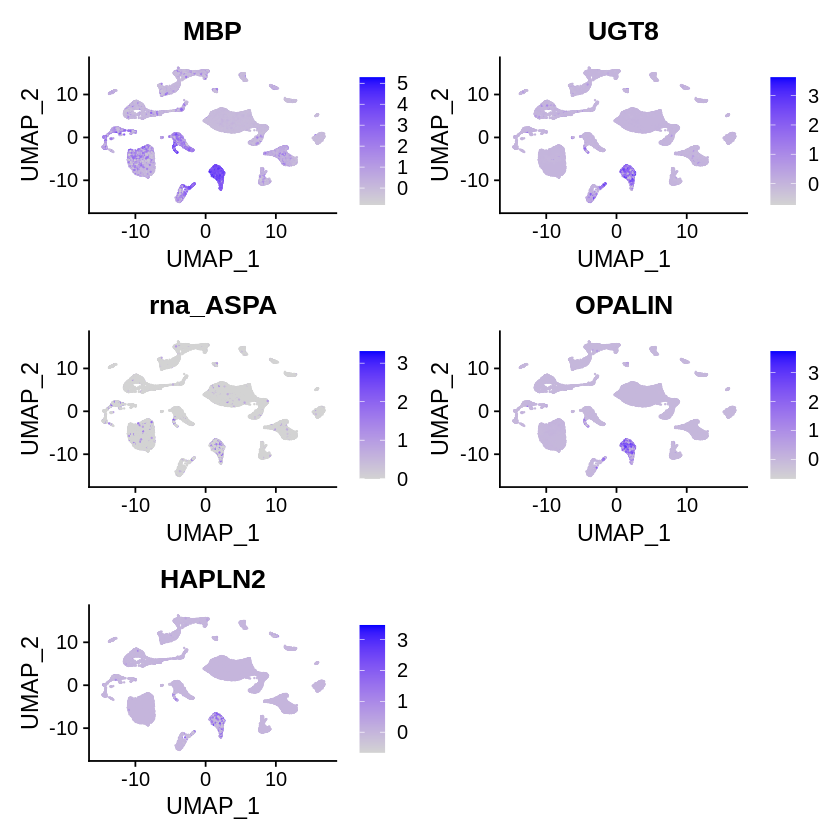

In [50]:
FeaturePlot(nuclei.integrated, features = c('MBP','UGT8','ASPA','OPALIN','HAPLN2'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

Warning message:
“Could not find SLC17A7 in the default search locations, found in RNA assay instead”
Warning message:
“Could not find TBR1 in the default search locations, found in RNA assay instead”


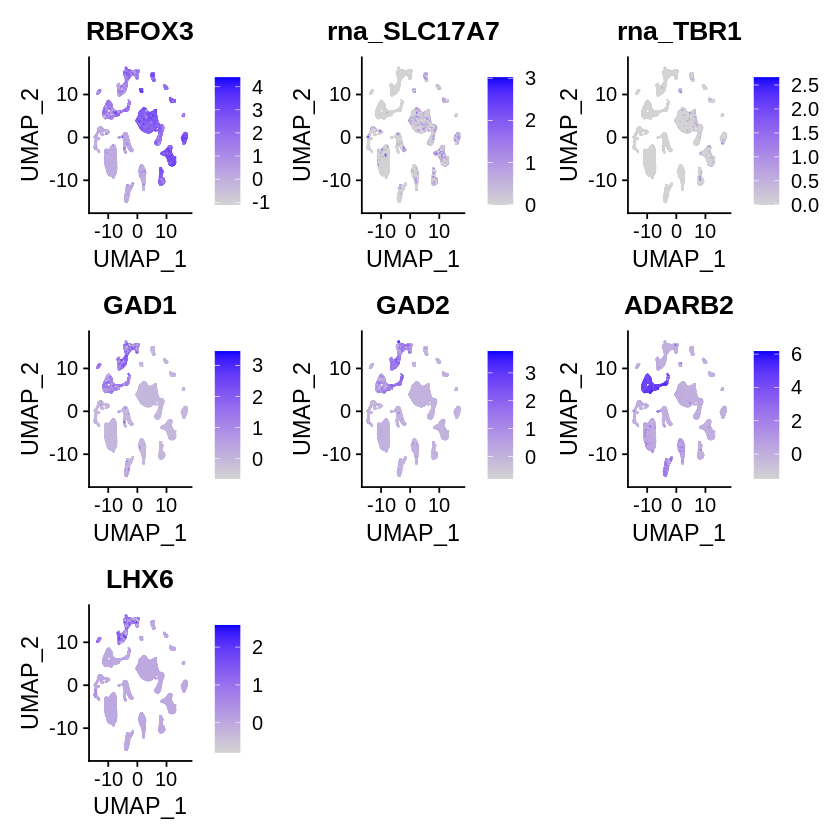

In [51]:
FeaturePlot(nuclei.integrated, features = c('RBFOX3','SLC17A7','TBR1','GAD1','GAD2','ADARB2','LHX6'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

Warning message:
“Could not find PDGFRA in the default search locations, found in RNA assay instead”


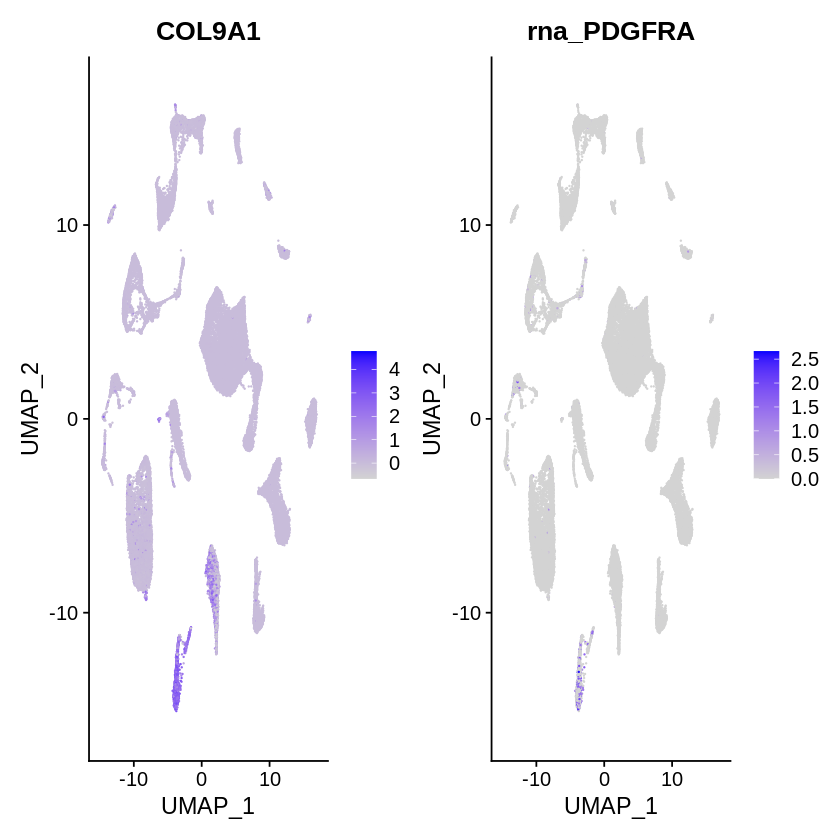

In [52]:
FeaturePlot(nuclei.integrated, features = c('COL9A1','PDGFRA'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

Warning message:
“Could not find GJA1 in the default search locations, found in RNA assay instead”


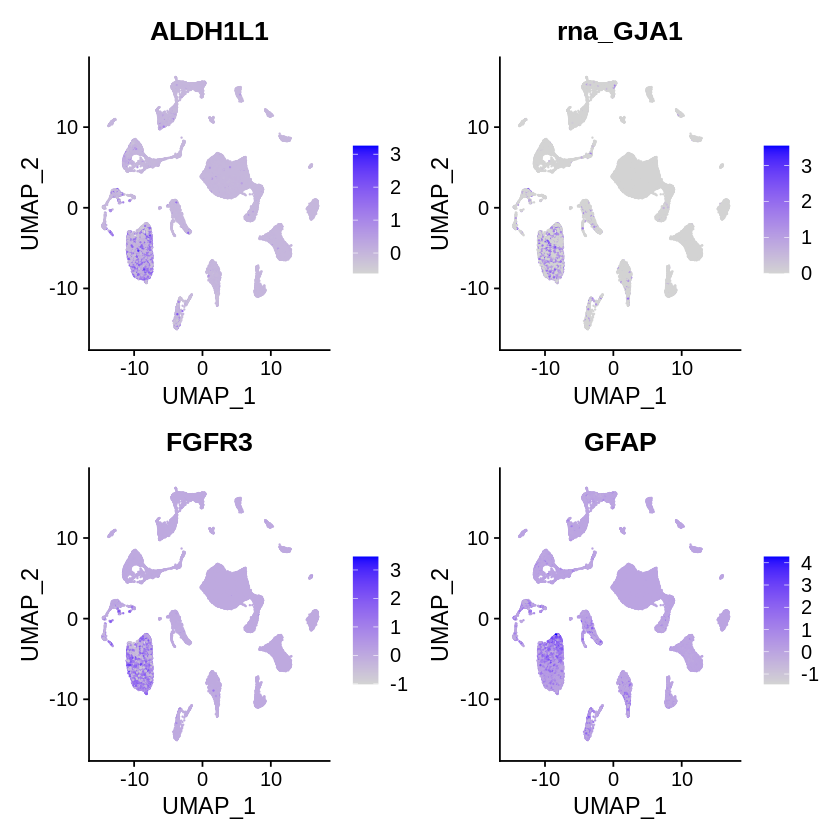

In [53]:
FeaturePlot(nuclei.integrated, features = c('ALDH1L1','GJA1','FGFR3','GFAP'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

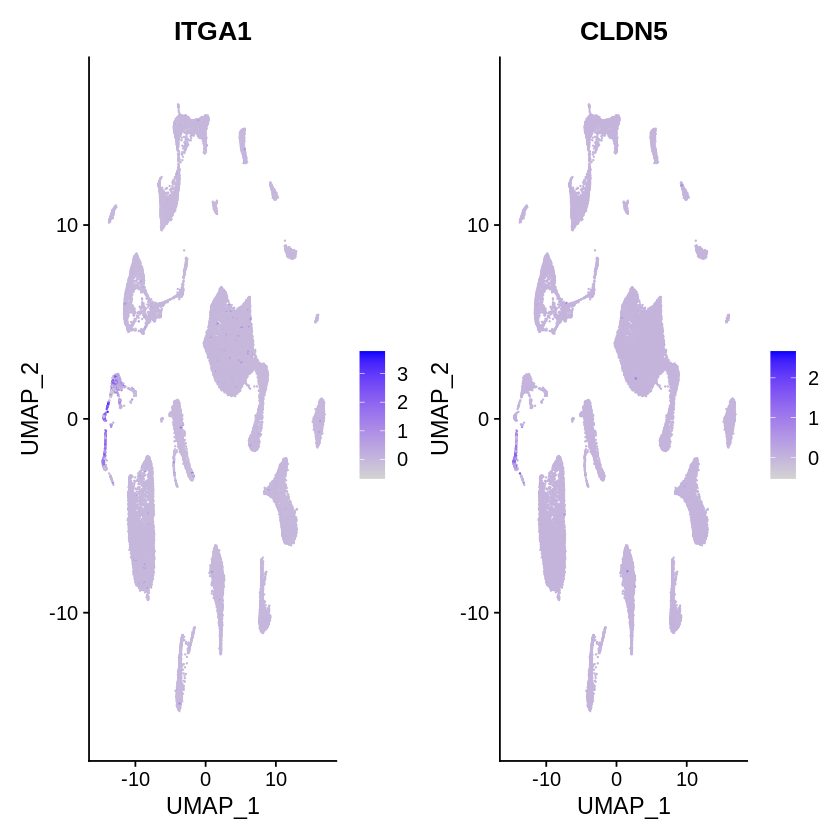

In [54]:
FeaturePlot(nuclei.integrated, features = c('ITGA1','CLDN5'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

Warning message:
“Could not find TYROBP in the default search locations, found in RNA assay instead”


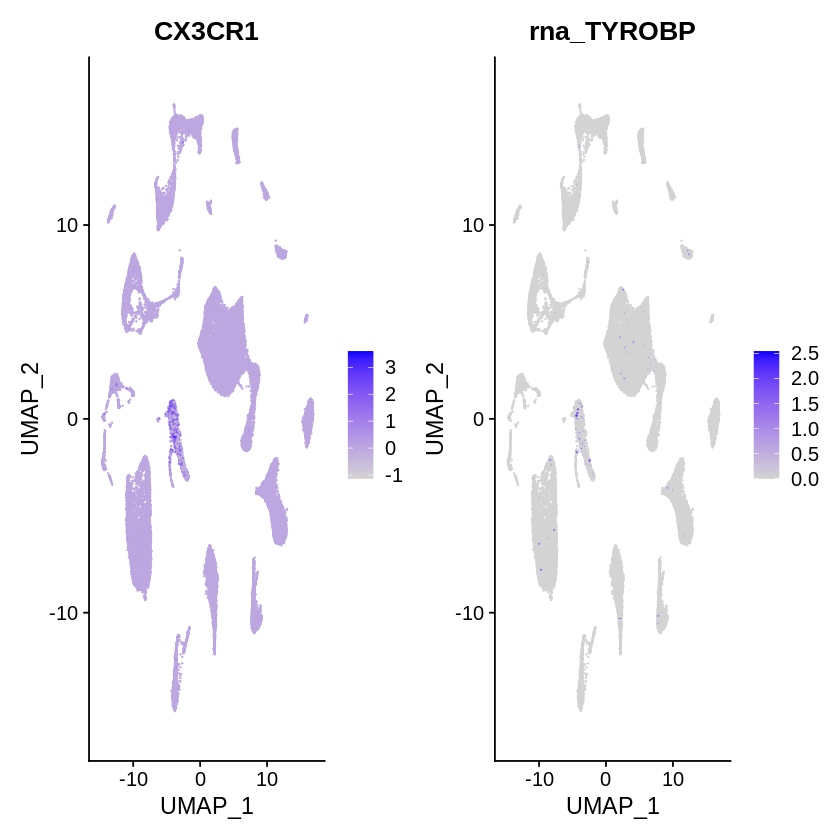

In [55]:
FeaturePlot(nuclei.integrated, features = c('CX3CR1','TYROBP'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

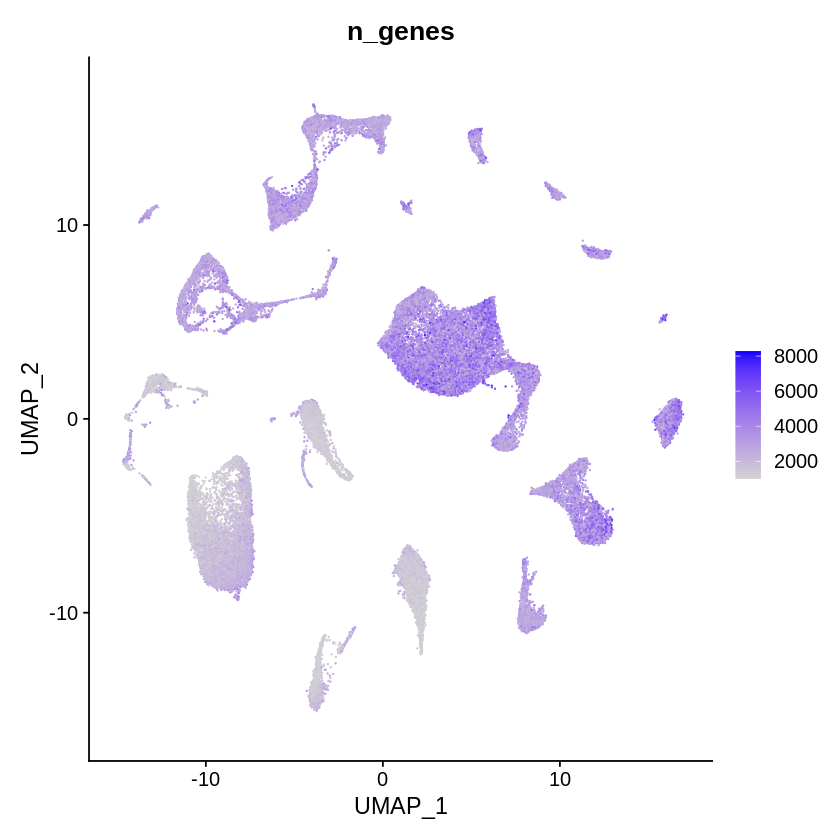

In [56]:
FeaturePlot(nuclei.integrated, features = c('n_genes'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 53611
Number of edges: 4417148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9895
Number of communities: 20
Elapsed time: 20 seconds


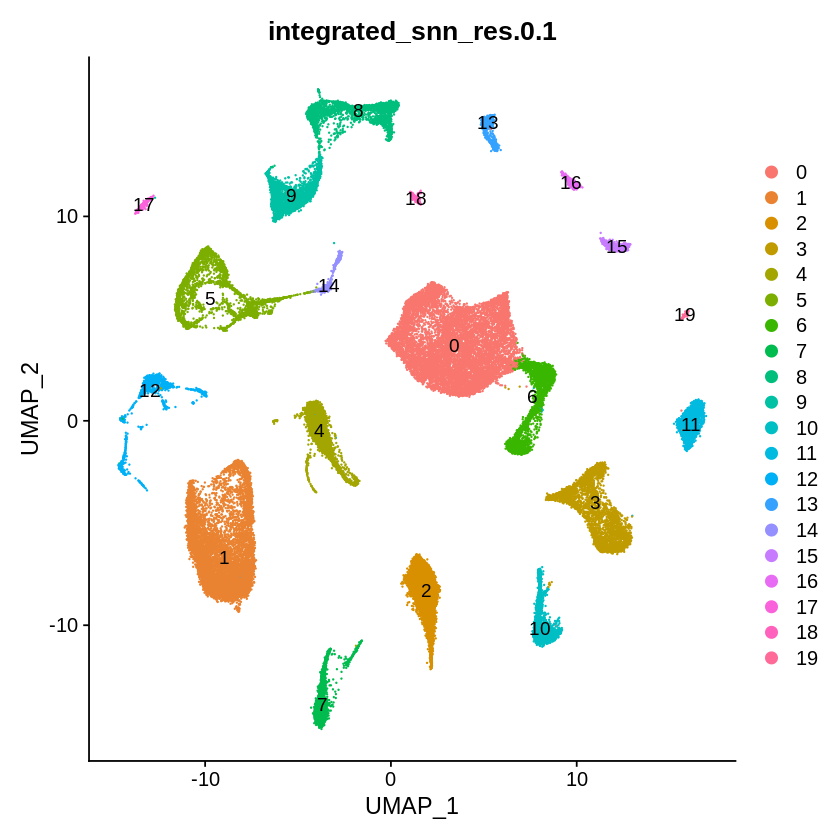

In [57]:
nuclei.integrated <- FindClusters(nuclei.integrated, resolution = 0.1)
DimPlot(nuclei.integrated, group.by = "integrated_snn_res.0.1",label = TRUE) 

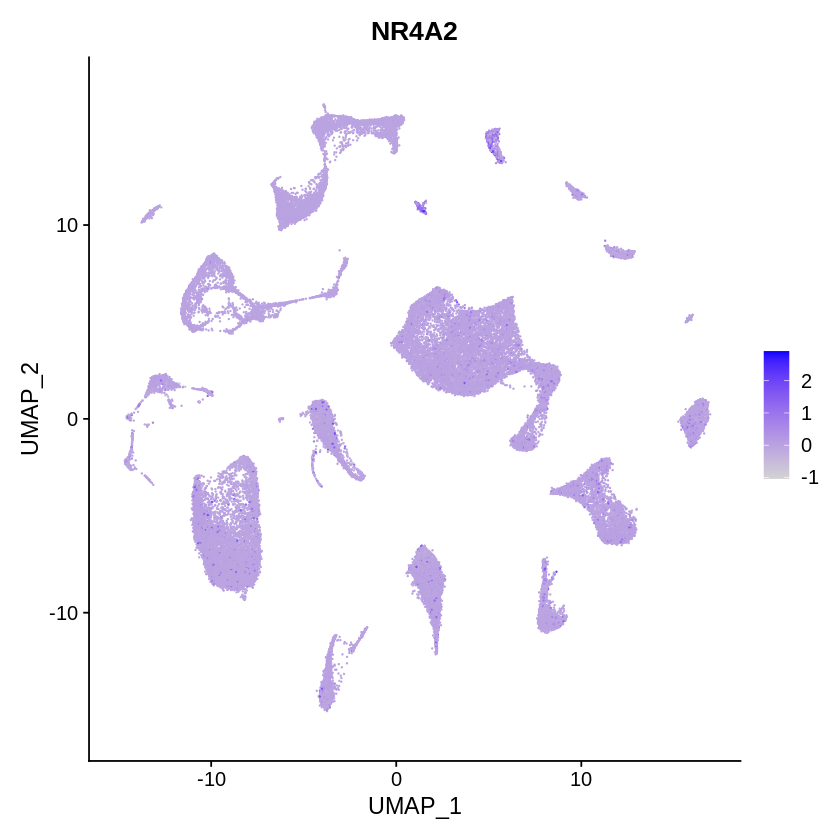

In [58]:
FeaturePlot(nuclei.integrated, features = c('NR4A2'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

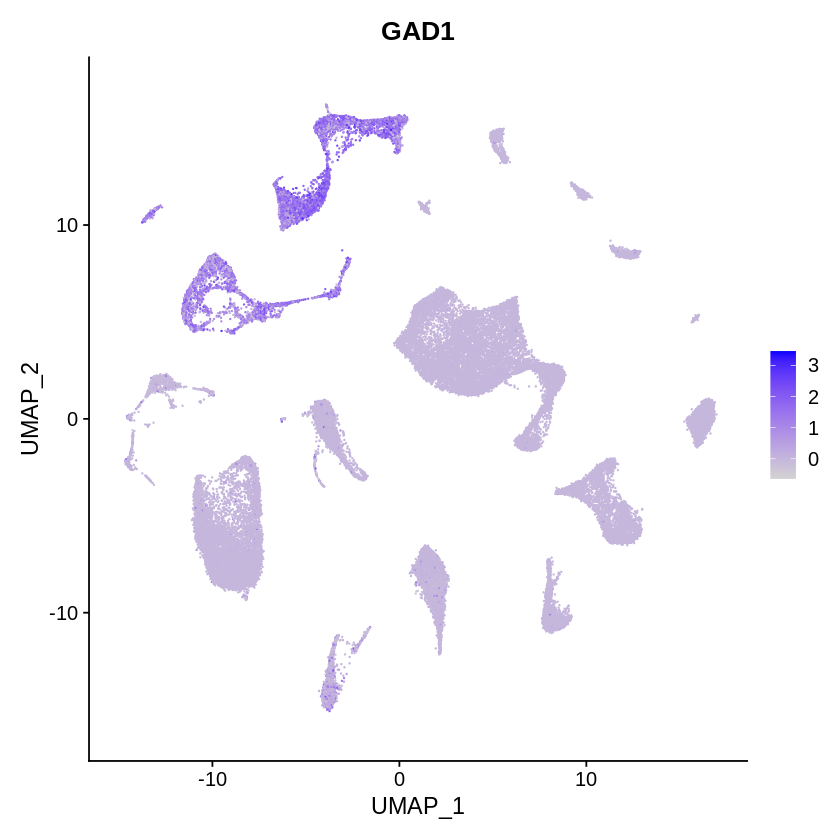

In [59]:
FeaturePlot(nuclei.integrated, features = c('GAD1'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

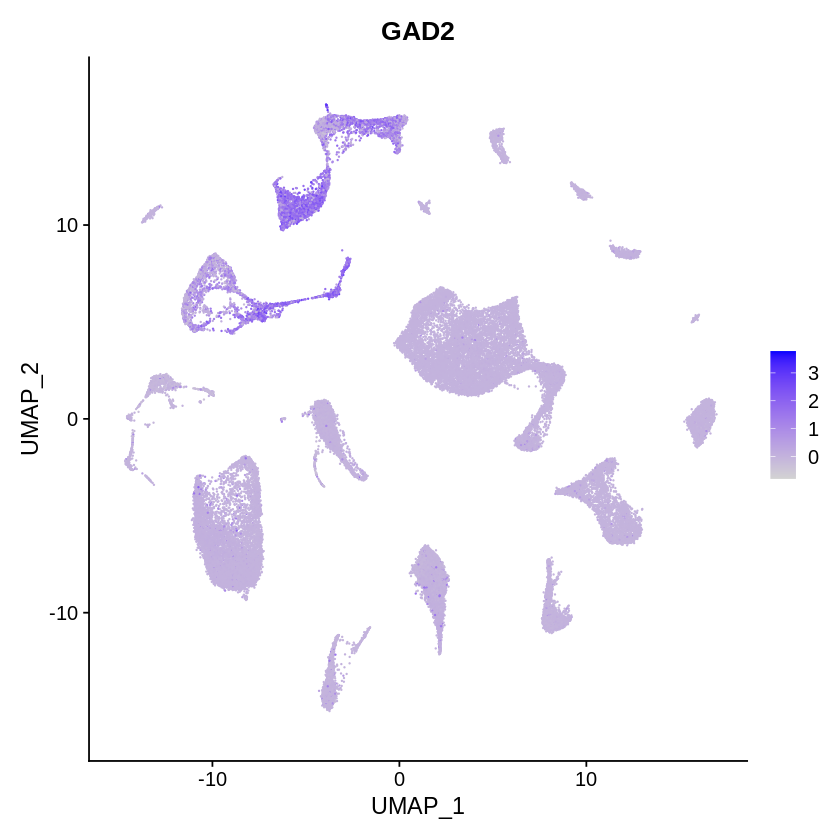

In [60]:
FeaturePlot(nuclei.integrated, features = c('GAD2'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

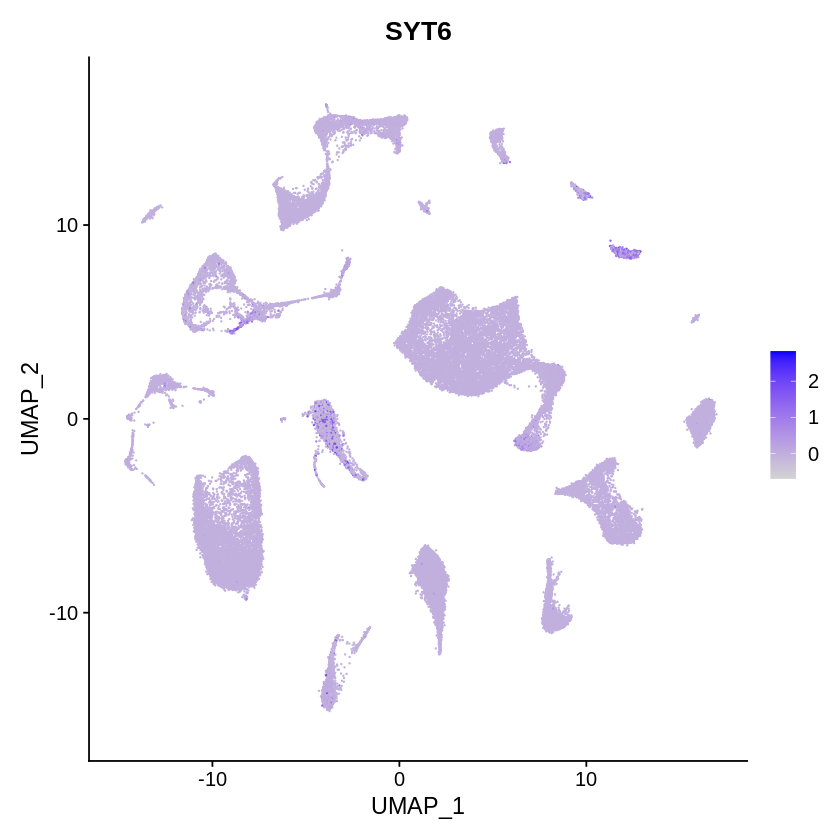

In [61]:
FeaturePlot(nuclei.integrated, features = c('SYT6'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

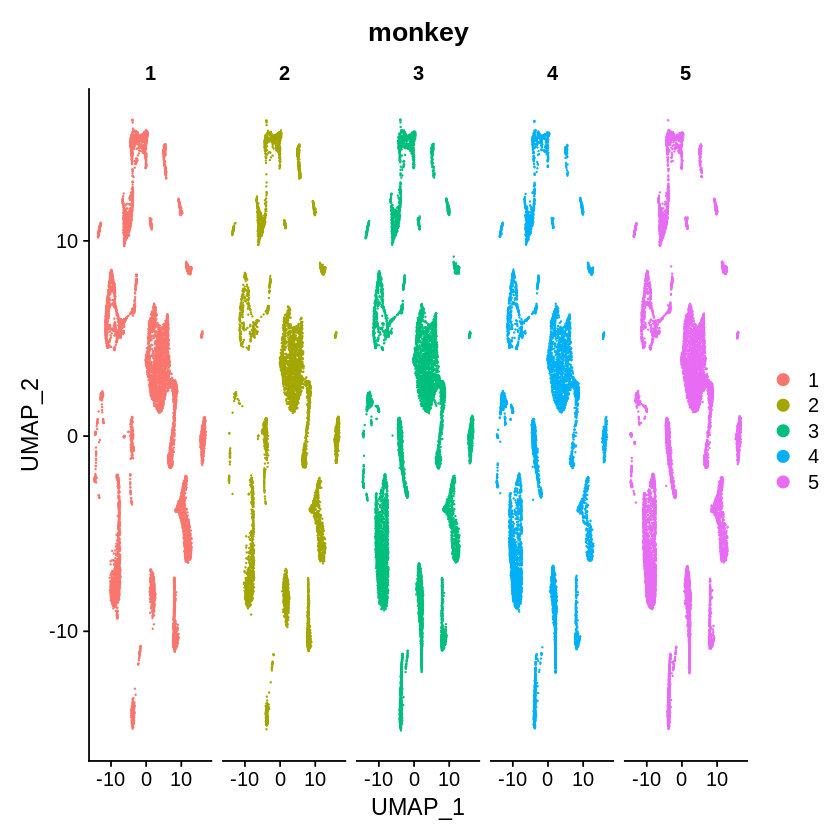

In [62]:
DimPlot(nuclei.integrated, reduction = "umap", group.by = "monkey",split.by ="monkey")

In [63]:
saveRDS(nuclei.integrated, file = "./processed_data/nuclei.integrated_1000_7000_30_30_neuron2200_final_1.rds")

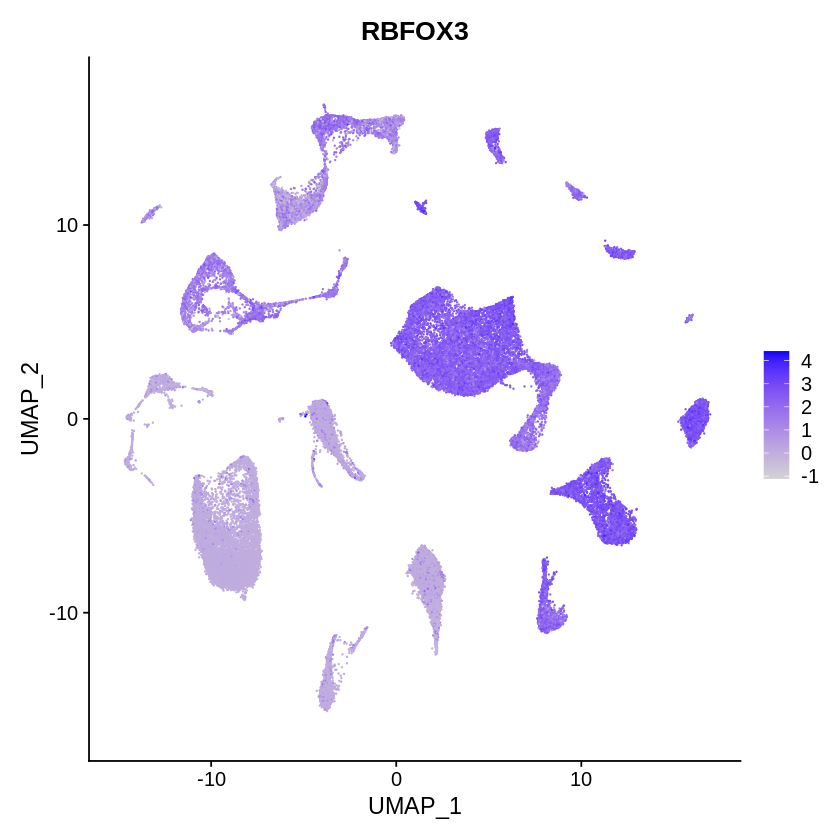

In [64]:
FeaturePlot(nuclei.integrated, features = c('RBFOX3'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

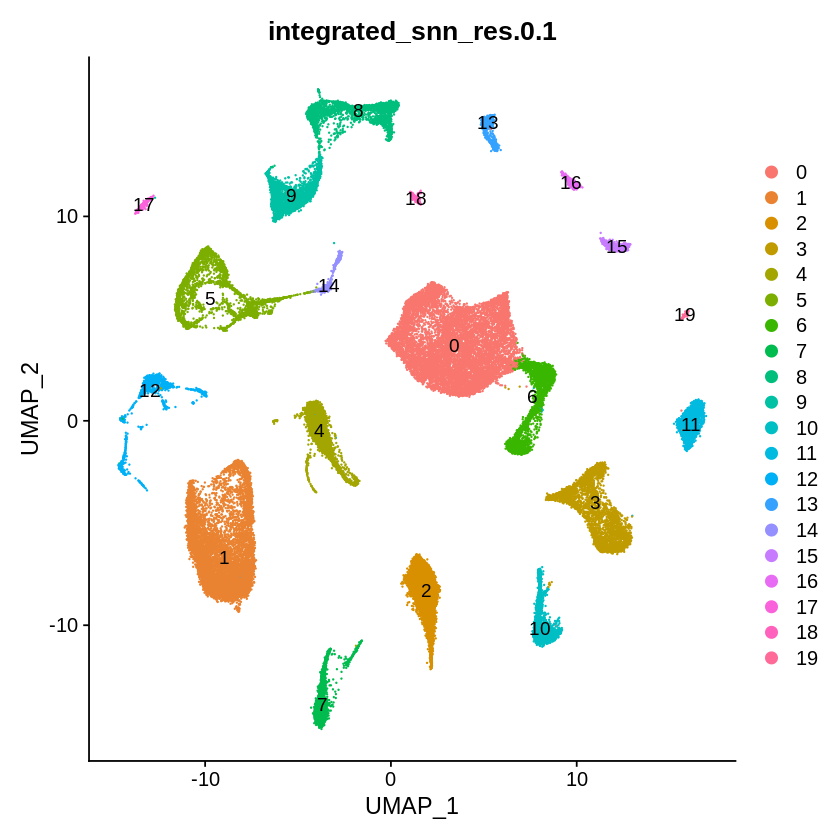

In [65]:
DimPlot(nuclei.integrated, group.by = "integrated_snn_res.0.1",label = TRUE) 

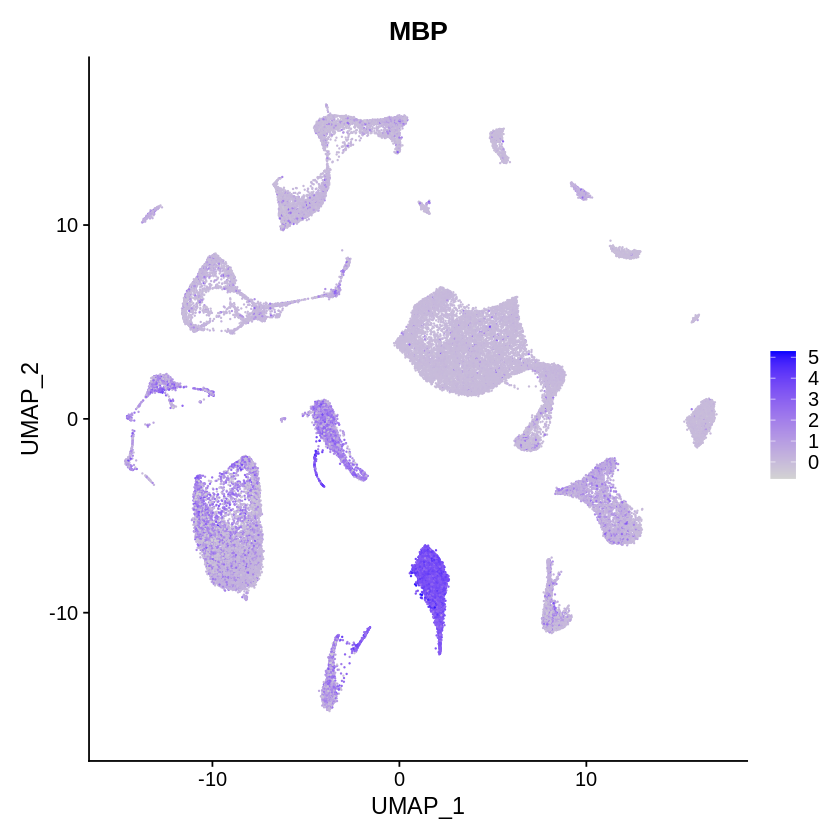

In [70]:
FeaturePlot(nuclei.integrated, features = c('MBP'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

Warning message:
“Cannot find identity 20”


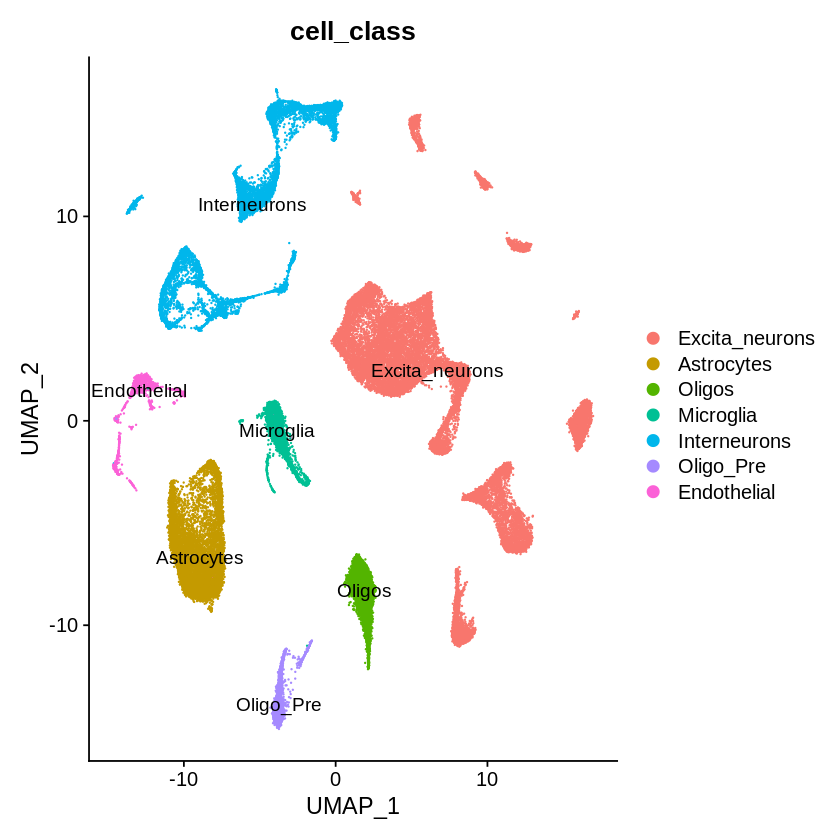

In [68]:
Idents(object = nuclei.integrated) <- 'integrated_snn_res.0.1'
nuclei.integrated <- RenameIdents(object = nuclei.integrated,'0' = 'Excita_neurons', '1' = 'Astrocytes', '2' = 'Oligos','3' = 'Excita_neurons', '4' = 'Microglia', '5' = 'Interneurons','6' = 'Excita_neurons', '7' = 'Oligo_Pre', '8' = 'Interneurons'
                       , '9' = 'Interneurons', '10' = 'Excita_neurons','11' = 'Excita_neurons', '12' = 'Endothelial', '13' = 'Excita_neurons','14' = 'Interneurons', '15' = 'Excita_neurons', '16' = 'Excita_neurons'
                      , '17' = 'Interneurons', '18' = 'Excita_neurons','19' = 'Excita_neurons', '20' = 'Excita_neurons')
nuclei.integrated@meta.data$cell_class = Idents(object = nuclei.integrated)
DimPlot(nuclei.integrated, reduction = "umap", group.by = "cell_class",label=TRUE)

In [71]:
str(nuclei.integrated)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 2
  .. ..$ RNA       :Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:166149548] 35 60 66 120 128 153 171 183 194 202 ...
  .. .. .. .. .. ..@ p       : int [1:53612] 0 2683 5989 11928 15167 18004 21525 26150 29662 32810 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 30759 53611
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:30759] "CICP27" "AP006222.1" "MTND1P23" "MTND2P28" ...
  .. .. .. .. .. .. ..$ : chr [1:53611] "AAACCCAAGAATAACC-1-1" "AAACCCAAGACTGAGC-1-1" "AAACCCAAGCAATAAC-1-1" "AAACCCAAGCTAGATA-1-1" ...
  .. .. .. .. .. ..@ x       : num [1:166149548] 0.206 0.468 0.496 0.332 0.289 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i      

In [72]:
nuclei.integrated$RNA_snn_res.0.45 <- NULL
# nuclei.integrated$integrated_snn_res.0.02 <- NULL
# nuclei.integrated$integrated_snn_res.0.45 <- NULL

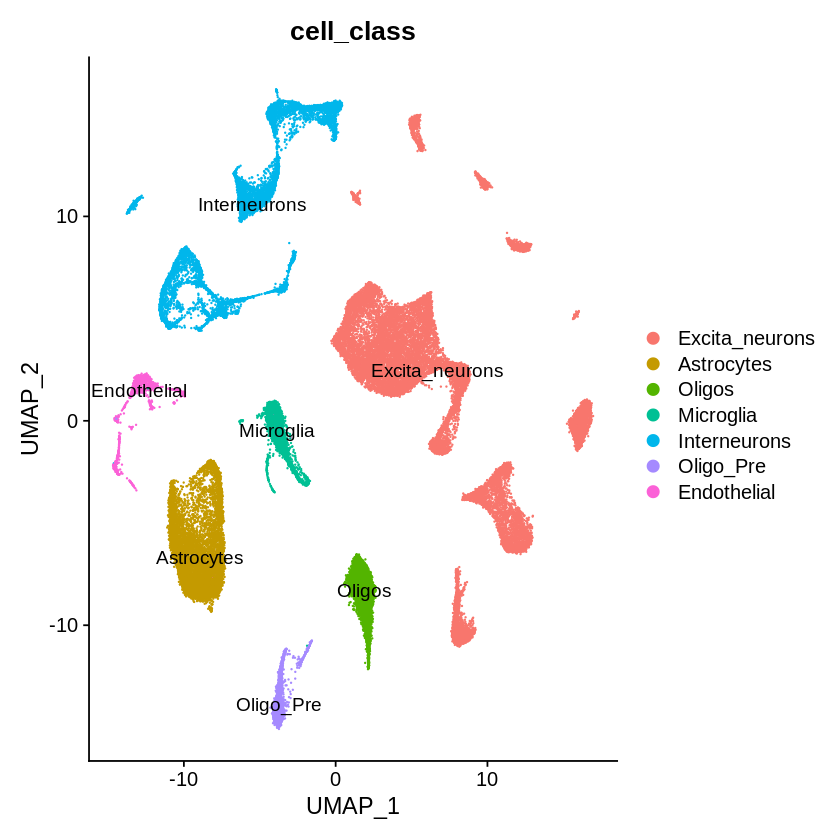

In [73]:
DimPlot(nuclei.integrated, group.by = "cell_class",label=TRUE)

In [81]:
saveRDS(nuclei.integrated, file = "./processed_data/nuclei.integrated_1000_7000_30_30_neuron2200_final_2_updated.rds")